# Surfaces in 3D

Now that we're familiar with 1D plots, it's time to move on to 3D visualizations!

## Summary of commands

In this exercise, we will demonstrate the following:
- [`np.meshgrid(x, y)`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) - Create a 2D grid of coordinate values based on 1D `x` and `y` arrays.
  - The result is two `X` and `Y` _2D arrays_ with the corresponding 1D arrays tiled across the other dimension.
- [`fig.add_subplot(projection='3d')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.add_subplot.html) - A common way of creating 3D axes.
- [`ax.plot_surface(X, Y, Z)`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html) - Create a 3D surface plot of `Z` on the domain defined by meshgrid `X` and `Y`.
- [`fig.colorbar(obj)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.colorbar.html) - Add a color bar corresponding to the `obj` plot element.

We will plot the function

$$ z(x,y) = \dfrac{\sin(x^2 + y^2)}{x^2 + y^2 + 10^{-16}} $$

for $x$ ranging between $-3$ and $3$, and $y$ ranging between $-4$ and $4$.
Use an increment of $0.1$ in both directions.
Include labels and a title, and add a color bar to the figure.

```{note}
The $10^{-16}$ in the denominator is needed to avoid division by zero when $x = y = 0$.
Some sources may write this as $\varepsilon$ (Greek letter epsilon) to represent a tiny quantity.
```

(80, 60)


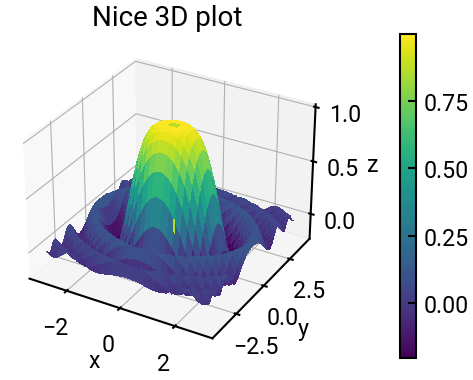

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# values
x = np.arange(-3, 3, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
print(X.shape)
Z = np.sin(X**2 + Y**2) / (X**2 + Y**2 + 1e-16)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', antialiased=False)
fig.colorbar(surf, pad=0.15, shrink=0.7)
ax.set(xlabel='x', ylabel='y', zlabel='z', title='Nice 3D plot')
plt.show()

## Several things to note

### Meshgrid
- Look at the shape of $X$ (or $Y$, $Z$): It is two dimensional, and if you look the values, it essentially repeats every value of $x$ at every value of $y$ (and vice versa).
- A lesson in descriptive variable names: In math, we are used to using lowercase letters for scalars/vectors, and uppercase letters for matrices.
So we do the same here!

### Surface plot
- We used the `cmap` parameter when making the surface plot to choose [an appropriate colormap](https://matplotlib.org/stable/users/explain/colors/colormaps.html).
Otherwise the whole plot is a default blue and less helpful.
- We also added `antialiased=False` which is somewhat similar to `shading('interp')` that you might be used to seeing in MATLAB.
- We did not modify the `rstride` and `cstride` parameters, but you could to make the rendering finer (e.g., set both to `1`).

### Other
- We had to tweak the color bar a little bit to make it fit better.
See the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.colorbar.html) for more details.
- We might not get the nice click-and-drag features of MATLAB plots in Colab (there are other interactive plotting libraries), but if you wanted to change the viewing angle, you can explore [`ax.view_init(elev, azim, roll)`](https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html).